# BANK CUSTOMER SEGMENTATION with K-Means

## Day 19 of 110 Days of ML Challenge

### Project by Anjolaoluwa (Dataprincess)

![Inside a bank image](https://media.istockphoto.com/id/1136980835/sv/vektor/bank-bes%C3%B6kare-och-arbets-tagare-finansiell-r%C3%A5dgivning-center-med-v%C3%A4ntrum-mottagning-och-atm.jpg?s=612x612&w=0&k=20&c=N1AHT1gzGe6kUPAmTPtjMp7ACHLykGZNC2BO8NxnjB0=)

## Hi friends 👋

Today, we'll be helping a Bank utilize their customer data to improve their operations.

The objectives of this project include helping the bank:

- Analyze credit card utilization patterns and identify opportunities for increased engagement.
- Personalize marketing strategies for different customer segments.
- Analyze engagement levels and churn risks across customer segments.

Let's go!!!

# Data Collection

In [1]:
# Import required libraries
import pandas as pd

df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Exploratory Data Analysis (EDA)

In [2]:
!pip install skimpy

## Data Summary

In [3]:
# Import required libraries
from skimpy import skim
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10127  │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 23     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 6     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA ┃ NA % ┃ mean      ┃ sd       ┃ p0        ┃ p25       ┃ p75       ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ CLIENTNUM      │  0 │    0 │ 740000000 │ 37000000 │ 710000000 │ 710000000 │ 770000000 │ 830000000 │ █  ▂▁▁ │  │
│ │ Customer_Age   │  0 │    0 │        46 │        8 │        26 │        41 │        52 │        73 │ ▁▅█▆▂  │  │
│ │ Dependent_coun │  0 │    0 │       2.3 │      1.3 │         0 │         1 │         3 │         5 │ ▃▅██▅▁ │  │
│ │ t              │    │      │           │          │           │           │           │           │        │  │
│ │ Months_on_book │  0 │    0 │        36 │        8 │        13 │        31 │        40 │        56 │ ▁▂▄█▃▁ │  │
│ │ Total_Relation │  0 │    0 │       3.8 │      1.6 │         1 │         3 │         5 │         6 │ ▃▄█▇▇▆ │  │
│ │ ship_Count     │    │      │           │          │           │           │           │           │        │  │
│ │ Months_Inactiv │  0 │    0 │       2.3 │        1 │         0 │         2 │         3 │         6 │  ▅▇█▁▁ │  │
│ │ e_12_mon       │    │      │           │          │           │           │           │           │        │  │
│ │ Contacts_Count │  0 │    0 │       2.5 │      1.1 │         0 │         2 │         3 │         6 │ ▁▄██▃▁ │  │
│ │ _12_mon        │    │      │           │          │           │           │           │           │        │  │
│ │ Credit_Limit   │  0 │    0 │      8600 │     9100 │      1400 │      2600 │     11000 │     35000 │ █▂▁▁ ▁ │  │
│ │ Total_Revolvin │  0 │    0 │      1200 │      810 │         0 │       360 │      1800 │      2500 │ █▂▅▇▅▄ │  │
│ │ g_Bal          │    │      │           │          │           │           │           │           │        │  │
│ │ Avg_Open_To_Bu │  0 │    0 │      7500 │     9100 │         3 │      1300 │      9900 │     35000 │ █▂▁▁ ▁ │  │
│ │ y              │    │      │           │          │           │           │           │           │        │  │
│ │ Total_Amt_Chng │  0 │    0 │      0.76 │     0.22 │         0 │      0.63 │      0.86 │       3.4 │   ▁█   │  │
│ │ _Q4_Q1         │    │      │           │          │           │           │           │           │        │  │
│ │ Total_Trans_Am │  0 │    0 │      4400 │     3400 │       510 │      2200 │      4700 │     18000 │ ██▁ ▁  │  │
│ │ t              │    │      │           │          │           │           │           │           │        │  │
│ │ Total_Trans_Ct │  0 │    0 │        65 │       23 │        10 │        45 │        81 │       140 │ ▂▆█▇▂▁ │  │
│ │ Total_Ct_Chng_ │  0 │    0 │      0.71 │     0.24 │ 

The table above shows the distribution of our different numerical columns, we'll refer back to the histograms as we proceed with the EDA.

Also, great! No null values, let's check for duplicates

In [4]:
df.duplicated().sum()

0

Amazing! No duplicates. We're lucky to have such a clean dataset!

Now, let's see how many unique values each categorical column has

In [5]:
cat_col = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df[cat_col].nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

Let's save our numerical data in another variable and well, also see how many unique values each has

In [6]:
num_col = df.drop(columns=cat_col)
num_col = num_col.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
num_col.nunique()

Customer_Age                  45
Dependent_count                6
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

##  Univariate Analysis

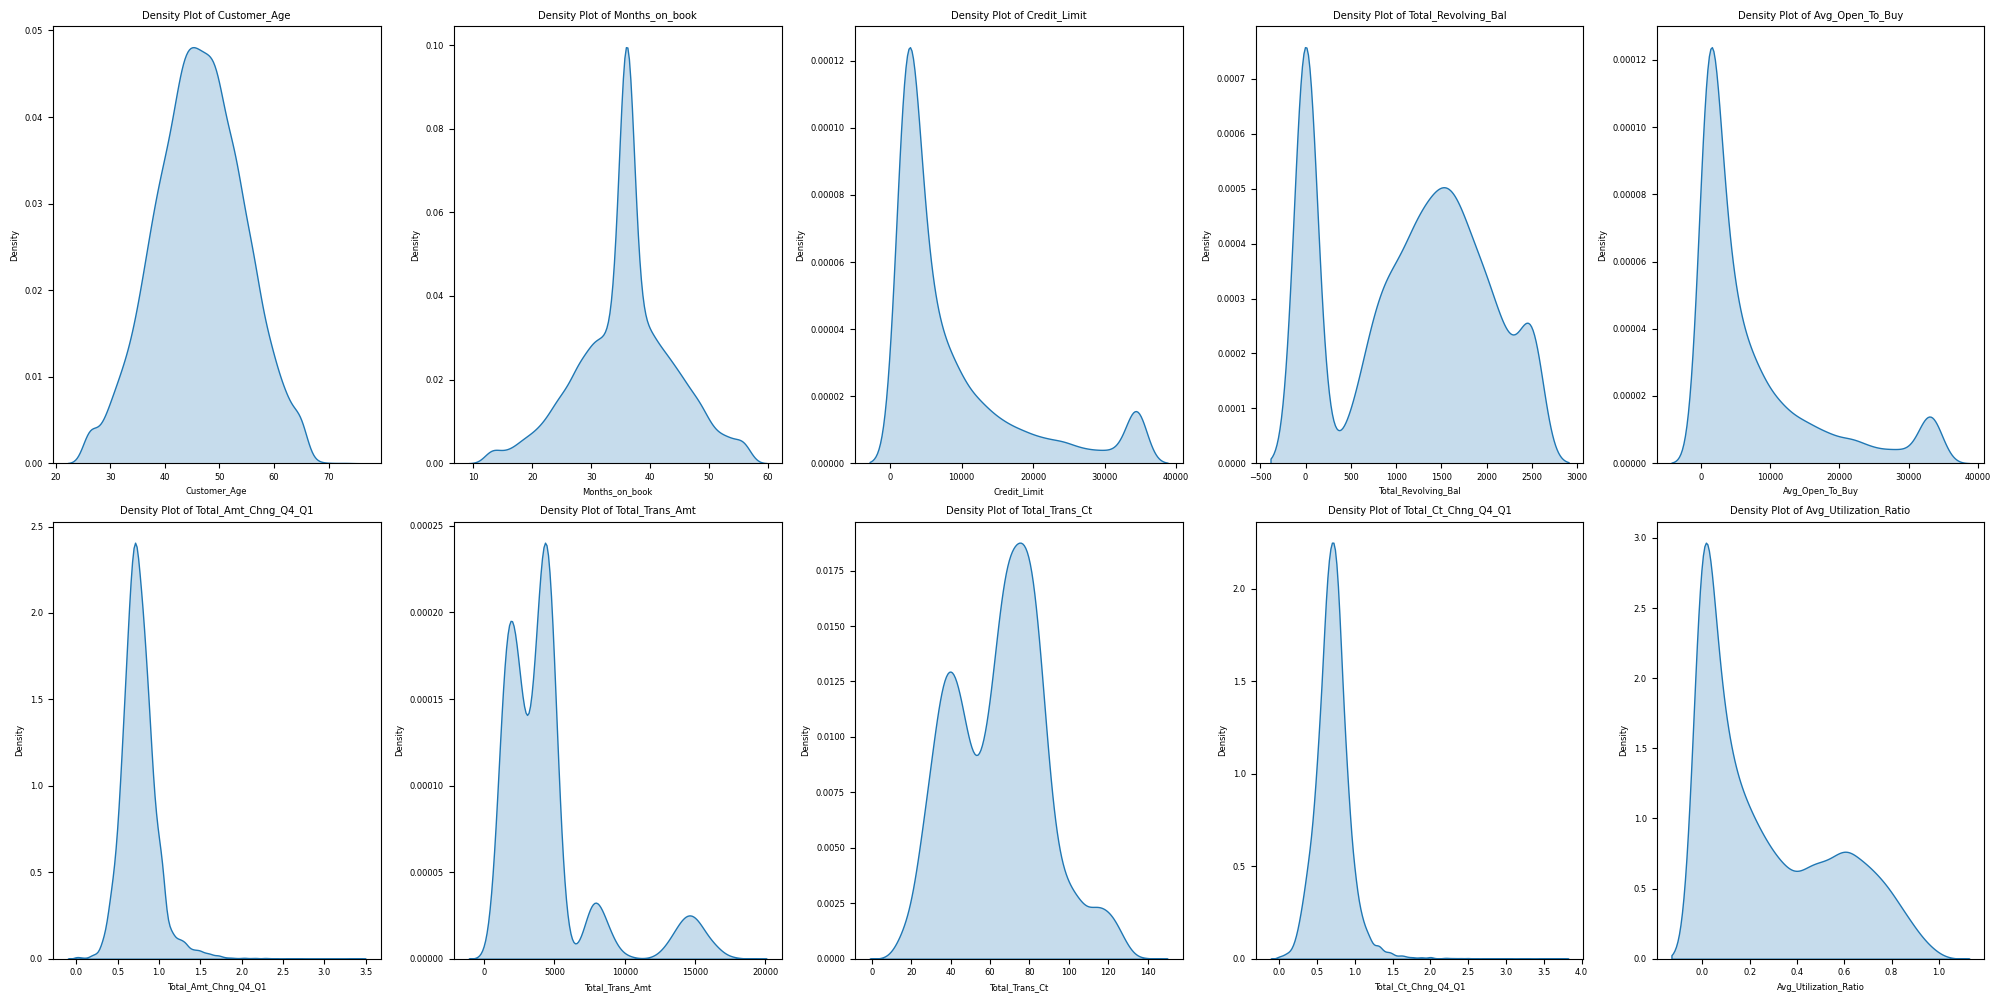

In [8]:
# Store continuous data in a variable for univariate analysis
con_col = num_col.drop(columns=['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'])
plt.rcParams['font.size'] = 6
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(con_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()

## Major Insights

*The age data has a perfect normal distribution which is typical of age data*

1. The curve of **Months_on_book** indicates that most customers have been with the bank for 35 months (thereabout), but there's a subset with much higher or lower values which indicate a group of long-term customers and a group of newer customers.

2. The density plot of **Credit_Limit** shows a left-skewed distribution, indicating that most customers have lower credit limits.

3. The bimodal distribution of **Total_Revolving_Bal** with a peak at 0 and another curve to the right suggests two customer groups: those who fully pay off balances (peak at 0) and those with revolving balances. This suggests a link between lower credit limits and high revolving balances, where customers with lower limits may be more likely to carry revolving balances.

4. The curve of **Avg_Open_To_Buy** column is identical to that of credit limit. It might be an indicator that a significant portion of customers have relatively low "available credit" compared to the mean, while some customers have much higher available credit.

5. In the **Total_Amt_Chng_Q4_Q1** and **Total_Ct_Chng_Q4_Q1** density plots, the normal distribution shifted to the left suggests that most customers experienced a decrease in the transaction amount and number of transactions, from Q4 to Q1. This could indicate seasonality or changes in customer behavior.

6. **Total_Trans_Amt**: The two left-skewed high peaks and two low troughs at the right side suggest that there are two primary groups of customers based on their transaction amounts. One group has lower transaction amounts, while the other group has higher transaction amounts.

7. The bimodal distribution in the **Total_Trans_Ct** curve indicates two subgroups of customers with different transaction counts. This could represent different usage patterns or customer segments.

8. **Avg_Utilization_Ratio** plot has a left skew that suggests that many customers have low utilization ratios (low credit card usage relative to credit limit), but there are also customers with higher ratios, potentially indicating different credit card usage behaviors.

## Bivariate Analysis

Here, we'll get more insight on how each numerical data affects the other and see if our assumptions in the univariate data are true...

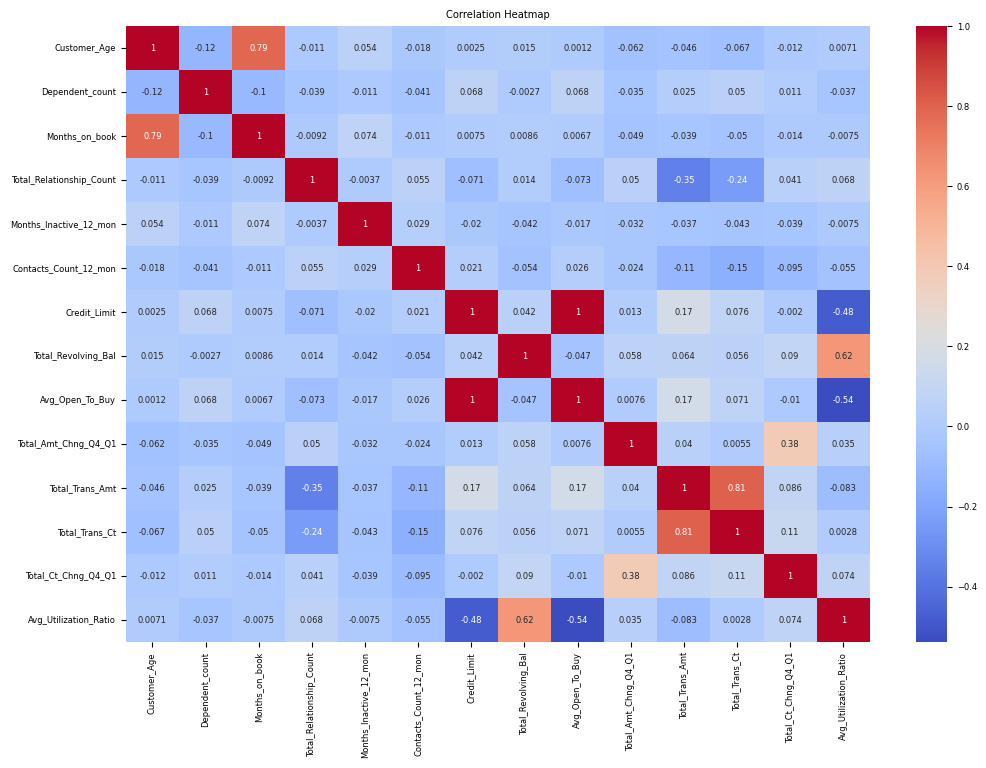

In [9]:
# Create a heatmap for bivariate analysis
plt.figure(figsize=(12, 8))
corr_matrix = num_col.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Alrighty! Most of our assumptions were right, and we got some fresh insights too!

## Major Insights


1. **Credit Limit vs Avg Utilization Ratio**: Customers with higher credit limits tend to use a smaller proportion of their available credit.
2. **Avg Open to Buy vs Avg Utilization Ratio**: Customers with more available credit tend to have lower credit utilization.
3. **Total Transaction Amount vs Total Relationship Count**: Customers with more relationships tend to have lower individual transaction amounts.
4. **Total Revolving Balance vs Avg Utilization Ratio**: Customers with higher credit utilization tend to carry higher revolving balances.
5. **Credit Limit vs Avg Open to Buy**: Perfectly correlated, risk of data leakage
6. **Total Transaction Amount vs Total Transaction Count**: Customers who make more transactions tend to spend more overall.
7. **Total Amt Change Q4 to Q1 vs Total Ct Change Q4 to Q1**: Larger changes in transaction amounts often correspond to larger changes in transaction counts.
8. ** Months on book vs Customer Age**: Older customers tend to have been with the bank for a longer time

Now, let's analyze our categorical data


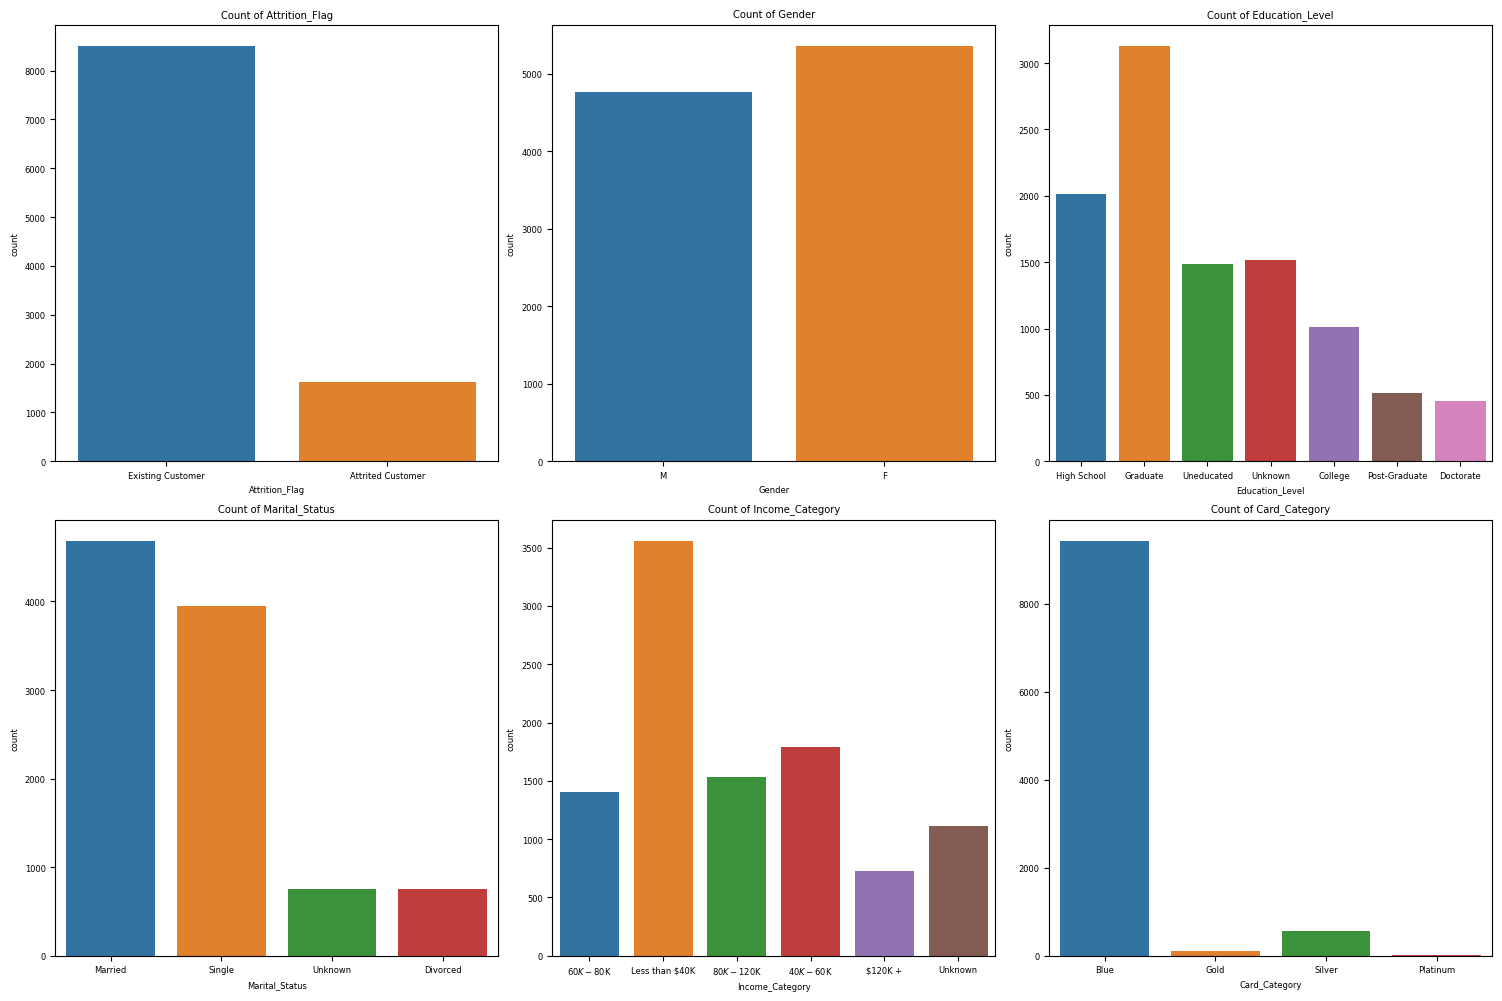

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(cat_col):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

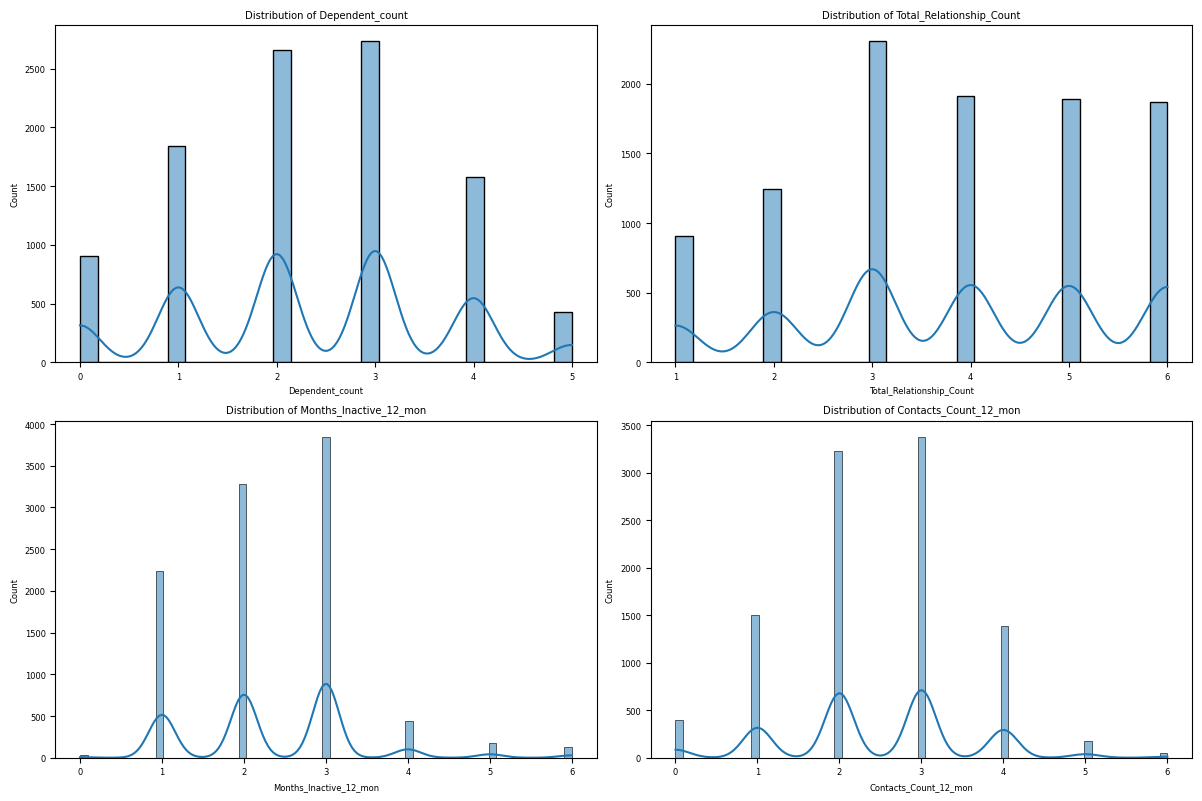

In [11]:
# Store Discrete numerical data in new variable
dis_col = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(dis_col):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

We now have an idea of the distribution of various categorical data,

Let's combine both categorical and continous data and see what insights we can draw from it.

In [12]:
# Filter relevant columns
filtered_data = df[['Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Gender']]

# Create a 3D scatter plot
fig = px.scatter_3d(filtered_data, x='Credit_Limit', y='Avg_Utilization_Ratio', z='Total_Revolving_Bal',
                    color='Gender', title='3D Scatter Plot: Credit Limit, Credit Utilization, and Revolving Balance',
                    labels={'Credit_Limit': 'Credit Limit', 'Avg_Utilization_Ratio': 'Avg Utilization Ratio',
                            'Total_Revolving_Bal': 'Total Revolving Balance'},
                    hover_data=['Gender'])

fig.show()



## Major Insight

- Men mostly have higher credit limit than women and lower credit utilization


# Data Preprocessing & Clustering & Cluster Analysis

In [13]:
# import required libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

## Encoding (Label and OneHot)


Here, we'll encode all our categorical data so they can be used for further analysis

In [14]:
data = df
# Categorical columns for label encoding
lab_cat_col = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in lab_cat_col:
    data[col] = label_encoder.fit_transform(data[col])

# One-hot encoding for 'Gender' and 'Attrition flag'
data = pd.get_dummies(df, columns=['Attrition_Flag', 'Gender'])

# Display the preprocessed data
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Segmentation Class

## Function for:
- scaling, dimensionality reduction, clustering, and cluster visualization
- Summarising clusters

We'll use this function to cluster different columns and draw analysis from it in the next part

In [15]:
class CustomerSegmentationAnalyzer:
    def __init__(self, data, features, clusters):
        self.data = data.copy()
        self.features = features
        self.clusters = clusters
        self.kmeans = None

    def analyze(self):
        selected_data = self.data[self.features]
        standardized_data = (selected_data - selected_data.mean()) / selected_data.std()

        if len(self.features) > 2:
            pca = PCA(n_components=2)
            pca_result = pca.fit_transform(standardized_data)

            kmeans = KMeans(n_clusters=self.clusters, n_init=25, random_state=1234)
            cluster_labels = kmeans.fit_predict(pca_result)

            self.data['Cluster'] = kmeans.labels_.tolist()

            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette='viridis')
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.title('Standardized Data Clusters')
            plt.legend(title='Cluster')
            plt.show()
        else:
            kmeans = KMeans(n_clusters=self.clusters, n_init=25, random_state=1234)
            cluster_labels = kmeans.fit_predict(standardized_data)

            plt.figure(figsize=(10, 8))

            x_variable = self.features[0]
            y_variable = self.features[1]

            cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=self.features)

            self.data['Cluster'] = kmeans.labels_.tolist()

            ax = sns.scatterplot(data=standardized_data,
                                x=x_variable,
                                y=y_variable,
                                hue=cluster_labels,
                                palette='colorblind',
                                alpha=0.8,
                                s=150,
                                legend=False)

            ax = sns.scatterplot(data=cluster_centers,
                                x=x_variable,
                                y=y_variable,
                                hue=cluster_centers.index,
                                palette='colorblind',
                                s=600,
                                marker='D',
                                ec='black',
                                legend=False)

            for i in range(len(cluster_centers)):
                plt.text(x=cluster_centers[x_variable][i],
                        y=cluster_centers[y_variable][i],
                        s=i,
                        horizontalalignment='center',
                        verticalalignment='center',
                        size=15,
                        weight='bold',
                        color='white')

            plt.xlabel(x_variable)
            plt.ylabel(y_variable)
            plt.title('Cluster Visualization')
            plt.show()

    def analyze_clusters(self, analysis_type):
        if analysis_type == "credit_utilization":
            aggregation_columns = {
                'Customer_Age': 'mean',
                'Total_Amt_Chng_Q4_Q1': 'median',
                'Avg_Utilization_Ratio': 'median',
                'Income_Category': 'median',
                'Card_Category': 'median',
                'Months_on_book': 'mean',
                'Total_Relationship_Count': 'median',
                'Credit_Limit': 'mean',
                'Total_Revolving_Bal': 'mean',
                'Total_Amt_Chng_Q4_Q1': 'mean',
                'Total_Trans_Amt': 'mean',
                'Total_Trans_Ct': 'mean',
                'Total_Ct_Chng_Q4_Q1': 'mean',
            }
        elif analysis_type == "marketing_strategy":
            aggregation_columns = {
                'Gender_F': 'mean',
                'Gender_M': 'mean',
                'Customer_Age': 'mean',
                'Income_Category': 'median',
                'Card_Category': 'median',
                'Total_Relationship_Count': 'mean',
                'Dependent_count': 'mean',
                'Education_Level': 'mean',
            }
        elif analysis_type == "engagment_level":
            aggregation_columns = {
                'Gender_F': 'mean',
                'Gender_M': 'mean',
                'Customer_Age': 'mean',
                'Total_Amt_Chng_Q4_Q1': 'mean',
                'Avg_Utilization_Ratio': 'mean',
                'Income_Category': 'median',
                'Months_on_book': 'median',
                'Total_Relationship_Count': 'median',
                'Total_Amt_Chng_Q4_Q1': 'mean',
                'Total_Trans_Amt': 'mean',
                'Total_Trans_Ct': 'mean',
                'Total_Ct_Chng_Q4_Q1': 'mean',
                'Avg_Utilization_Ratio': 'mean',
                'Months_Inactive_12_mon': 'mean',
                'Avg_Open_To_Buy': 'mean',
                'Attrition_Flag_Attrited Customer': 'mean',
                'Attrition_Flag_Existing Customer': 'mean'
            }
        else:
            raise ValueError("Invalid analysis_type. Choose from 'credit_utilization', 'marketing_strategy', 'engagment_level'.")

        grouped_stats = self.data.groupby('Cluster').agg(aggregation_columns).round(2)

        return grouped_stats


In [16]:
data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer',
       'Gender_F', 'Gender_M'],
      dtype='object')

## Determine the number of clusters

This function is to help us determine the optimal number of clusters for optimal clustering result

In [17]:
def n_cluster(data, features, max_clusters=10):

    # Select the columns for analysis
    selected_data = data[features]

    # Standardize the data
    standardized_data = (selected_data - selected_data.mean()) / selected_data.std()

    if selected_data.shape[1] > 3:
        # Use PCA-transformed data
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(standardized_data)
        fitting_data = pca_result
    else:
        # Use standardized data
        fitting_data = standardized_data

    wcss = []
    silhouette_scores = []
    calinski_scores = []

    for K in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=K, n_init=25, random_state=1234)
        kmeans.fit(fitting_data)

        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(fitting_data, kmeans.labels_))
        calinski_scores.append(calinski_harabasz_score(fitting_data, kmeans.labels_))

    plt.figure(figsize=(18, 5))

    # Plot WCSS
    plt.subplot(1, 3, 1)
    sns.lineplot(y=wcss, x=range(2, max_clusters + 1), color='red')
    sns.scatterplot(y=wcss, x=range(2, max_clusters + 1), s=150, color='red')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')

    # Plot Silhouette Score
    plt.subplot(1, 3, 2)
    sns.lineplot(y=silhouette_scores, x=range(2, max_clusters + 1), color='blue')
    sns.scatterplot(y=silhouette_scores, x=range(2, max_clusters + 1), s=150, color='blue')
    plt.title('Silhouette Score for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')

    # Plot Calinski-Harabasz Score
    plt.subplot(1, 3, 3)
    sns.lineplot(y=calinski_scores, x=range(2, max_clusters + 1), color='green')
    sns.scatterplot(y=calinski_scores, x=range(2, max_clusters + 1), s=150, color='green')
    plt.title('Calinski-Harabasz Score for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski Harabasz Score')

    plt.tight_layout()
    plt.show()


# Analyze and Interpret Clusters

### Objective one:
Analyze credit card utilization patterns and identify opportunities for increased engagement.

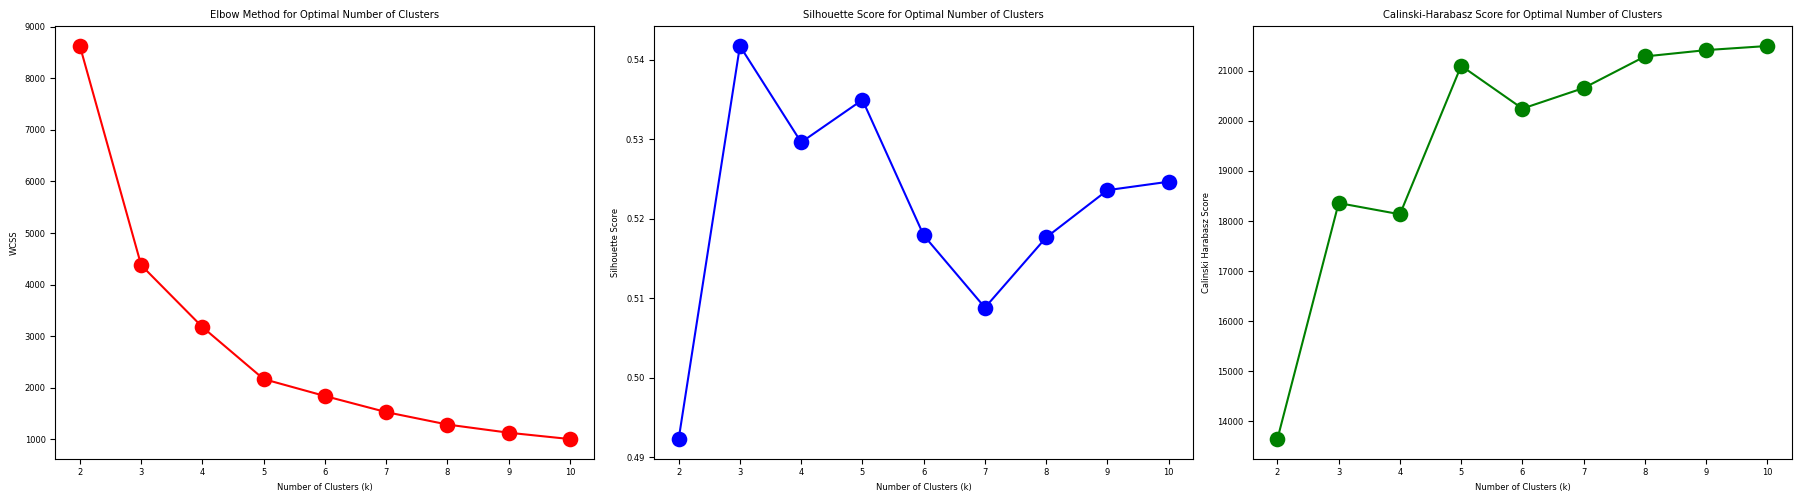

In [18]:
n_cluster(data, ['Total_Revolving_Bal', 'Avg_Utilization_Ratio'])

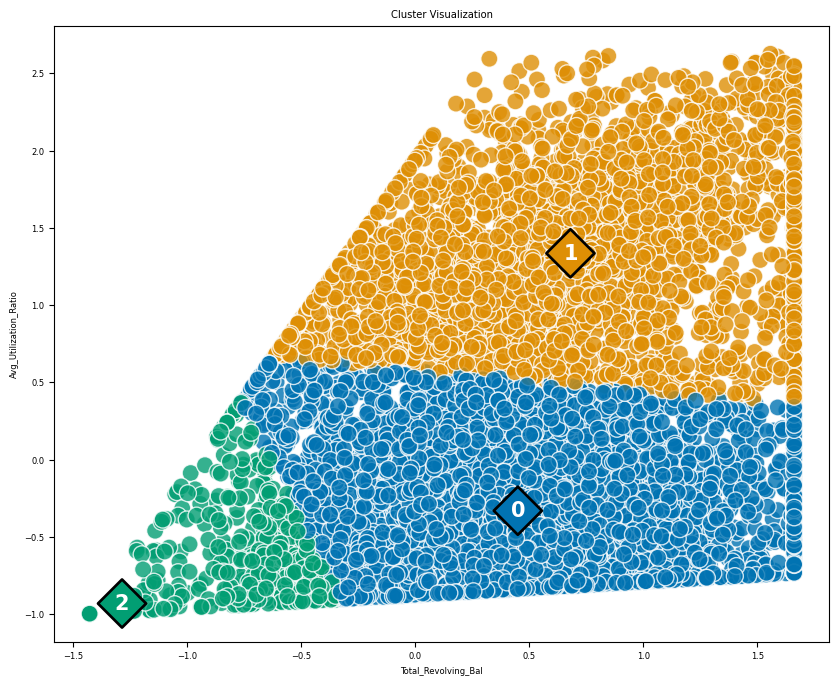

,Customer_Age,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
Cluster,,,,,,,,,,,,
0,46.39,0.77,0.16,3.0,0.0,36.01,4.0,12996.19,1529.78,4998.62,67.33,0.72
1,46.36,0.77,0.63,4.0,0.0,35.83,4.0,2740.22,1718.62,3965.03,64.91,0.73
2,46.21,0.74,0.00,3.0,0.0,35.92,4.0,8916.86,116.22,4072.65,61.58,0.67


In [19]:
analyzer = CustomerSegmentationAnalyzer(data, ['Total_Revolving_Bal', 'Avg_Utilization_Ratio'], clusters=3)
analyzer.analyze()
cluster_stats = analyzer.analyze_clusters("credit_utilization")
cluster_stats

### Insights:

- Cluster 1 shows high credit utilization, indicating that customers in this group often utilize most of their credit limit. Give credit limit increase offers to these customers to encourage more spending.

- Cluster 0 and 2 have customers with relatively high credit limits but low utilization. Tailor offers for these customers to increase their card usage, such as rewards for larger transactions or increased cashback.


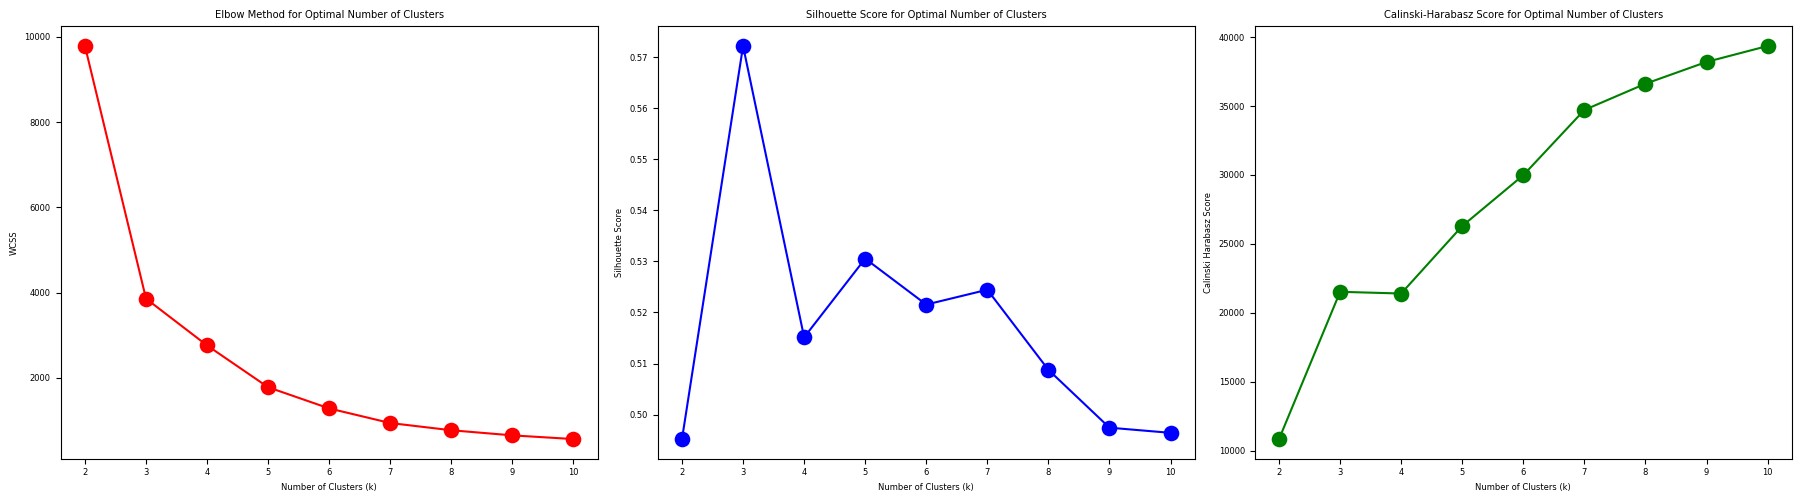

In [20]:
n_cluster(data, ['Credit_Limit', 'Avg_Utilization_Ratio'])

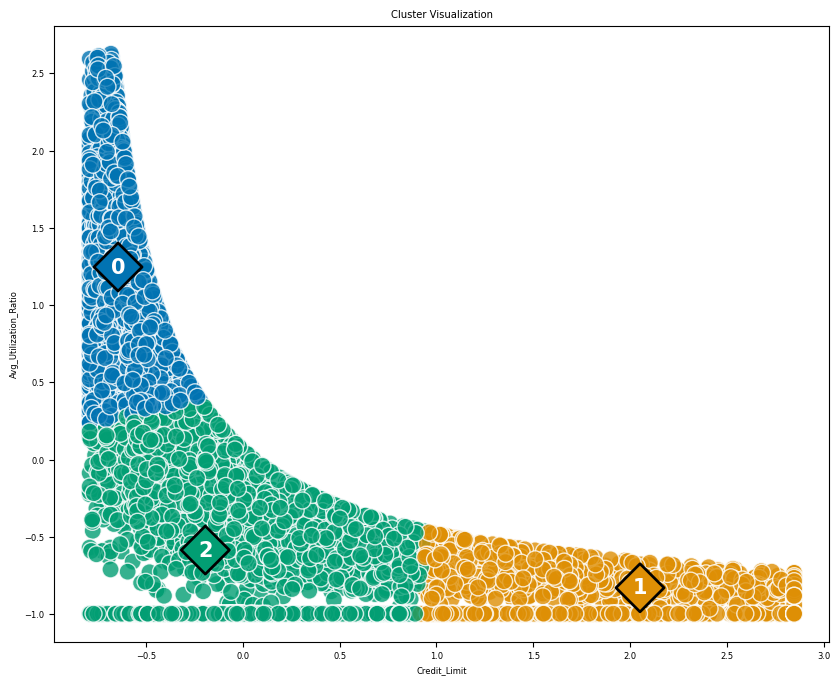

,Customer_Age,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
Cluster,,,,,,,,,,,,
0,46.35,0.77,0.61,4.0,0.0,35.82,4.0,2771.20,1666.30,4024.17,65.19,0.74
1,46.42,0.76,0.05,3.0,0.0,35.95,4.0,27298.36,1195.78,5413.95,68.19,0.71
2,46.28,0.75,0.10,3.0,0.0,35.99,4.0,6875.07,814.25,4351.29,63.62,0.70


In [21]:
analyzer = CustomerSegmentationAnalyzer(data, ['Credit_Limit', 'Avg_Utilization_Ratio'], clusters=3)
analyzer.analyze()
cluster_stats = analyzer.analyze_clusters("credit_utilization")
cluster_stats

### Insights:

- Cluster 0 has high credit utilization yet relatively low credit limit. The bank should keep an eye on these customers as this may be a sign of potential emotional stress

- Cluster 1 has a very low credit utilzization but relatively high credit limit. Tailor offers like rewards and cashbacks to this group to encourage more spending


### Objective two:
Personalize marketing strategies for different customer segments.


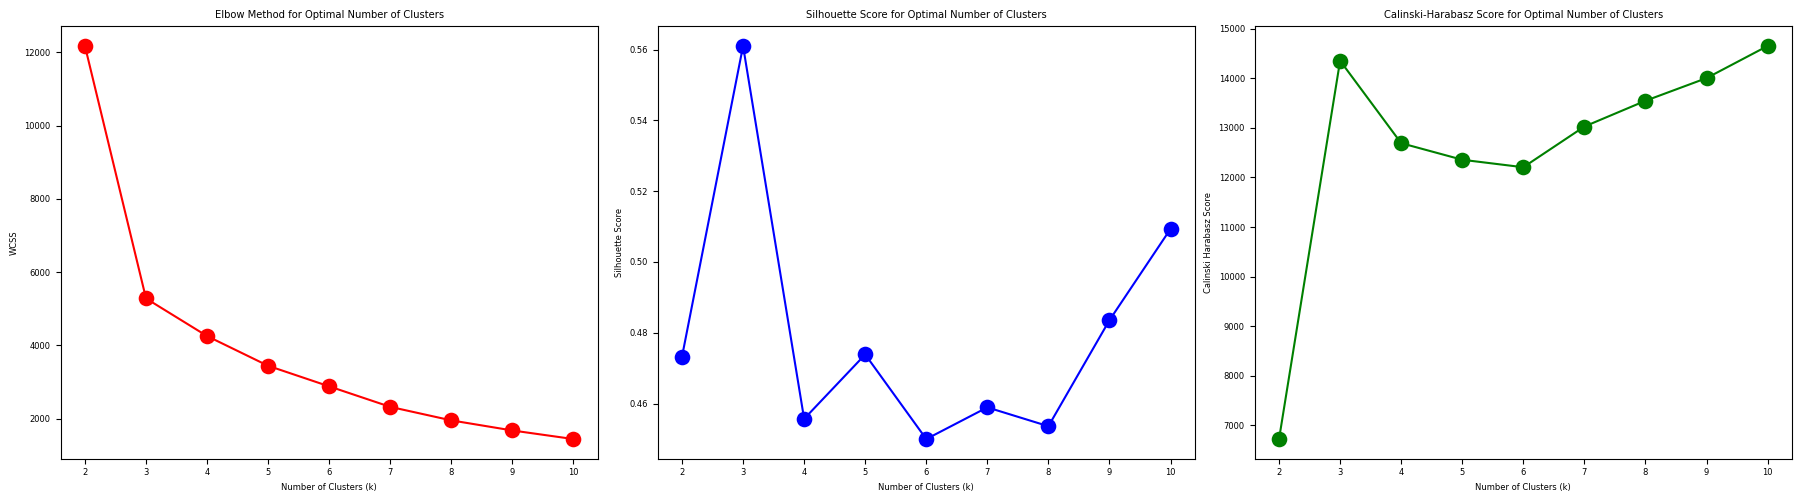

In [22]:
n_cluster(data, ['Income_Category', 'Total_Trans_Amt'])

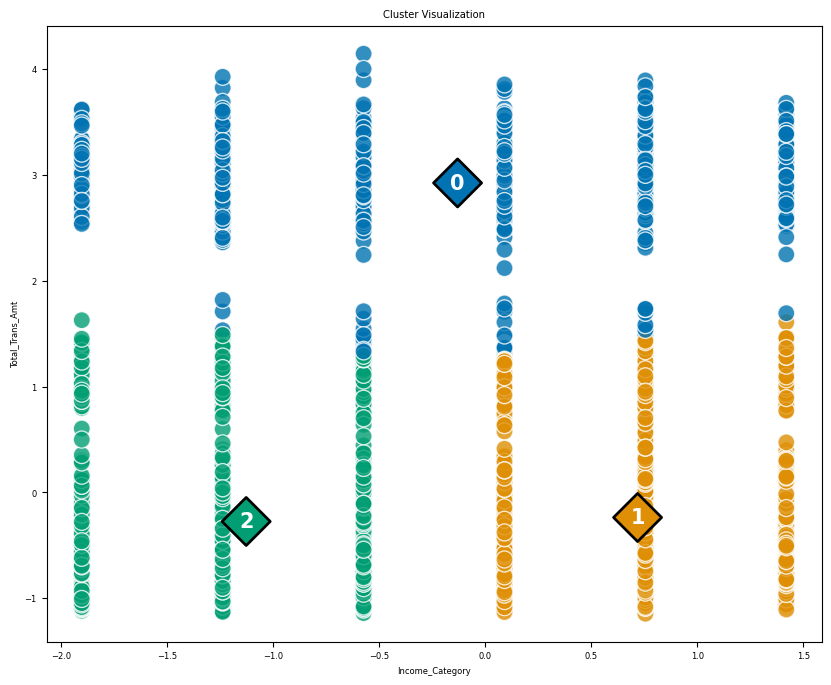

,Gender_F,Gender_M,Customer_Age,Income_Category,Card_Category,Total_Relationship_Count,Dependent_count,Education_Level
Cluster,,,,,,,,
0,0.38,0.62,45.04,3.0,0.0,2.40,2.28,3.20
1,0.71,0.29,46.42,4.0,0.0,3.93,2.33,3.07
2,0.27,0.73,46.46,1.0,0.0,3.94,2.39,3.11


In [23]:
analyzer = CustomerSegmentationAnalyzer(data, ['Income_Category', 'Total_Trans_Amt'], clusters=3)
analyzer.analyze()
cluster_stats = analyzer.analyze_clusters("marketing_strategy")
cluster_stats

### Insights:
- Cluster 0 are high spenders. Focus on premium services and products tailored to this group.

- Cluster 1 are majorly females and they have a higher income range but they low spending rate. Aim to increase engagement and spending among this segment.

- Cluster 2 are majorly males who are low spenders with relatively low icome.  Offer budgeting and money management workshops to help this segment make the most of their finances. Introduce starter credit cards with lower limits to encourage responsible spending and financial growth.

### Objective three:
Analyze engagement levels and churn risks across customer segments.



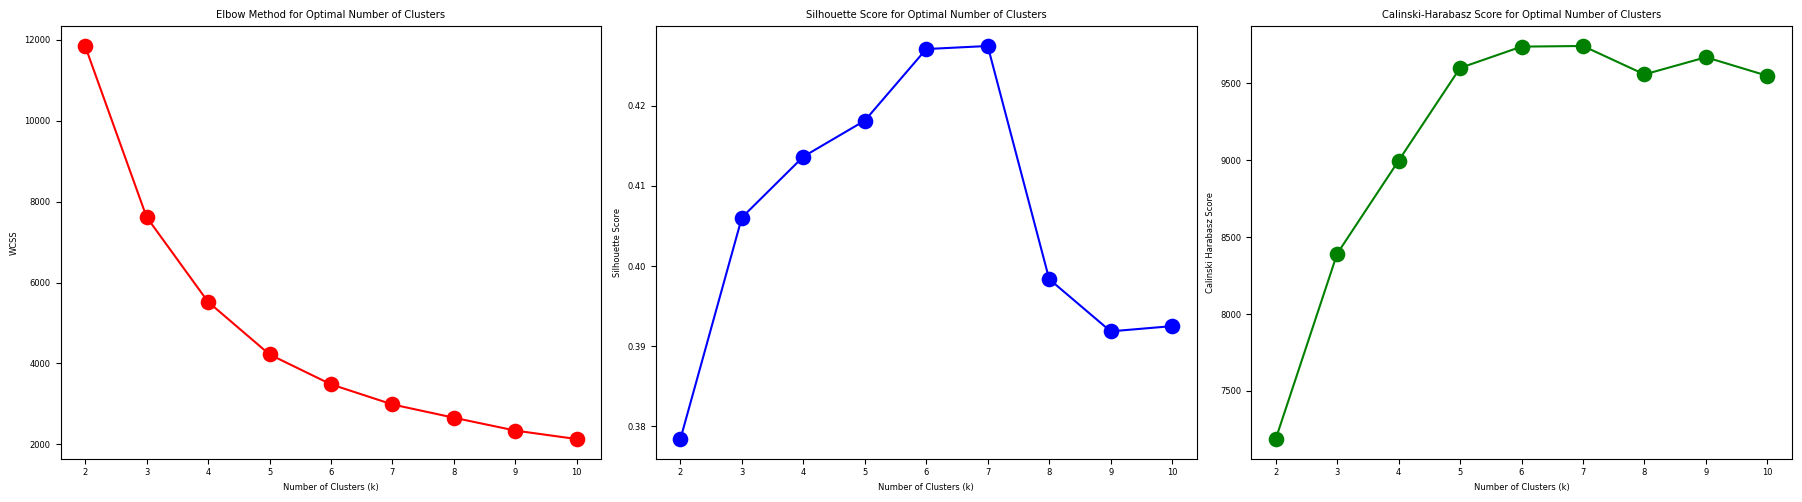

In [24]:
n_cluster(data, ['Total_Relationship_Count', 'Total_Trans_Ct'])

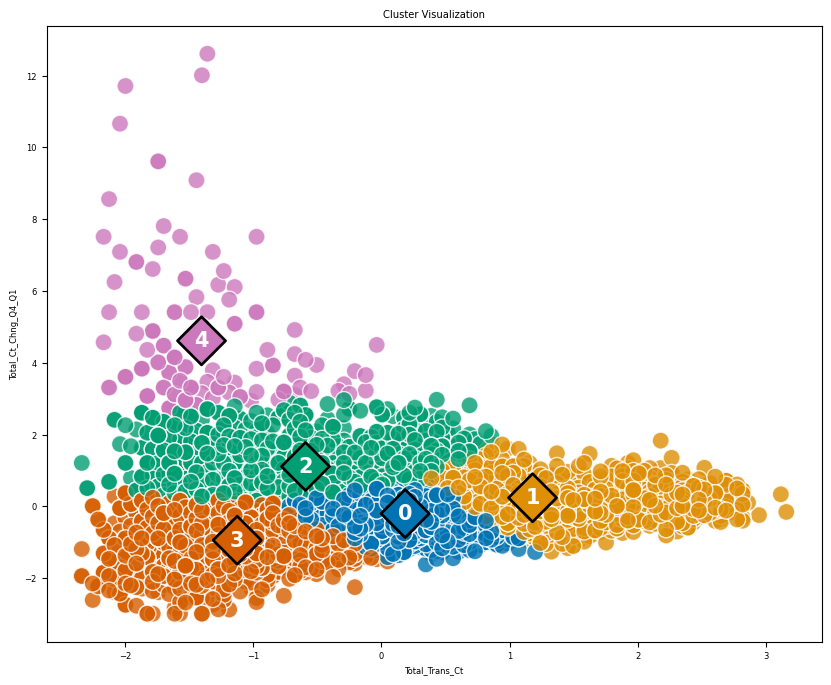

,Gender_F,Gender_M,Customer_Age,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category,Months_on_book,Total_Relationship_Count,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon,Avg_Open_To_Buy,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
Cluster,,,,,,,,,,,,,,,
0,0.55,0.45,46.22,0.75,0.28,3.0,36.0,4.0,4195.71,69.21,0.66,2.33,7383.34,0.08,0.92
1,0.57,0.43,45.94,0.76,0.28,3.0,36.0,3.0,7862.55,92.54,0.77,2.29,7996.71,0.02,0.98
2,0.49,0.51,46.10,0.87,0.29,3.0,36.0,4.0,2920.17,50.97,0.98,2.29,7331.60,0.12,0.88
3,0.49,0.51,46.88,0.68,0.24,3.0,36.0,4.0,1907.10,38.46,0.49,2.45,7049.60,0.47,0.53
4,0.37,0.63,49.54,1.18,0.28,3.0,36.0,4.0,1755.77,31.93,1.81,2.32,8139.43,0.04,0.96


In [25]:
analyzer = CustomerSegmentationAnalyzer(data, ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'], clusters=5)
analyzer.analyze()
cluster_stats = analyzer.analyze_clusters("engagment_level")
cluster_stats

### Insights:
- Customers in cluster 3 have low transaction count and low transaction changes from quarter 4 to quarter 1. This signifies low engagement, thus the reason they're more at risk of churning.

Action point: Offer personalized promotions and rewards to increase transaction activity and engagement for customers in cluster 3.

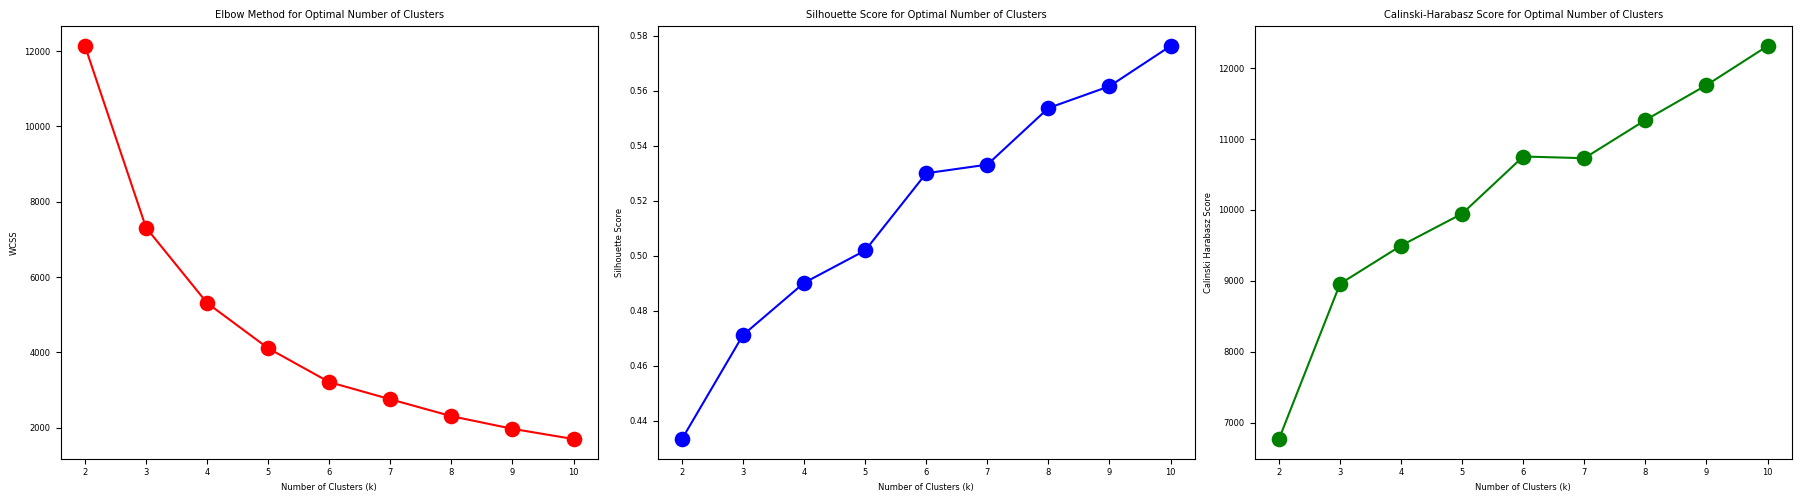

In [26]:
n_cluster(data, ['Avg_Utilization_Ratio', 'Months_Inactive_12_mon'])

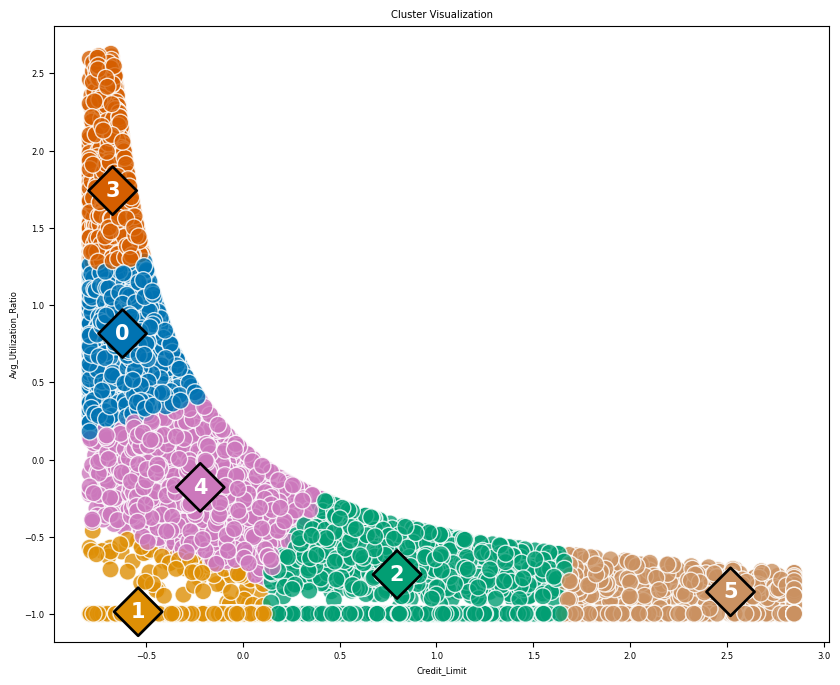

,Gender_F,Gender_M,Customer_Age,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category,Months_on_book,Total_Relationship_Count,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon,Avg_Open_To_Buy,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
Cluster,,,,,,,,,,,,,,,
0,0.68,0.32,46.19,0.77,0.50,4.0,36.0,4.0,4293.30,66.66,0.74,2.31,1521.77,0.07,0.93
1,0.67,0.33,46.17,0.73,0.00,4.0,36.0,4.0,3784.31,60.37,0.67,2.44,3691.40,0.39,0.61
2,0.26,0.74,46.24,0.77,0.07,3.0,36.0,4.0,4947.02,66.14,0.71,2.32,14757.68,0.14,0.86
3,0.75,0.25,46.52,0.77,0.75,4.0,36.0,4.0,3723.03,63.55,0.73,2.36,624.87,0.11,0.89
4,0.51,0.49,46.49,0.77,0.23,3.0,36.0,4.0,4568.43,65.32,0.72,2.30,5206.18,0.09,0.91
5,0.11,0.89,46.37,0.76,0.04,3.0,36.0,3.0,5677.15,69.16,0.71,2.31,30308.90,0.16,0.84


In [27]:
analyzer = CustomerSegmentationAnalyzer(data, ['Credit_Limit', 'Avg_Utilization_Ratio'], clusters=6)
analyzer.analyze()
cluster_stats = analyzer.analyze_clusters("engagment_level")
cluster_stats

**Insights:**

- Customers in cluster 1 have low credit limits and consequently low credit utilization, and are at higher risk of churning.

Action point: Provide credit limit increases and tailored offers to encourage higher credit utilization and retention for customers in cluster 1.

## **#NEXT STEPS**

1. **Fine-Tuning the Model**

2. **Trying Different Clustering Methods**

3. **Updating Over Time**